In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

In [ ]:
hbar = 6.58211956e-16 # eV*s
e = 1.60217662e-19 # C
c = 299792458 #m/s
me = 0.51099895000e6 # eV/c^2
alpha = 1/137
Z = 53


In [ ]:
def s(Z):
    return np.sqrt(1-Z**2/137**2) -1

def delta(z, eta):
    return z*np.sqrt(1+eta**2)/(137*eta)

def fermi(Z, eta):
    return eta**(2+2*s(Z))*np.exp(np.pi*delta(Z, eta))*np.abs(gamma(1+s(Z)+1j*delta(Z, eta)))**2

def Eta(epsilon):
    return np.sqrt(epsilon**2-1)

def epsilon(eta):
    return np.sqrt(1+eta**2)

def N(eta, Const, Q):
    return Const/(c**2)*eta**2*(Q-epsilon(eta))**2*fermi(Z, eta)


C:\Users\User\AppData\Local\Temp\ipykernel_26112\2274138777.py:8: RuntimeWarning: overflow encountered in exp
  return eta**(2+2*s(Z))*np.exp(np.pi*delta(Z, eta))*np.abs(gamma(1+s(Z)+1j*delta(Z, eta)))**2
C:\Users\User\AppData\Local\Temp\ipykernel_26112\2274138777.py:8: RuntimeWarning: invalid value encountered in multiply
  return eta**(2+2*s(Z))*np.exp(np.pi*delta(Z, eta))*np.abs(gamma(1+s(Z)+1j*delta(Z, eta)))**2


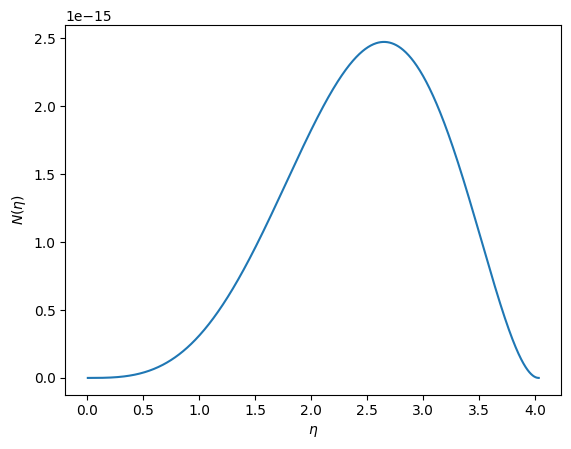

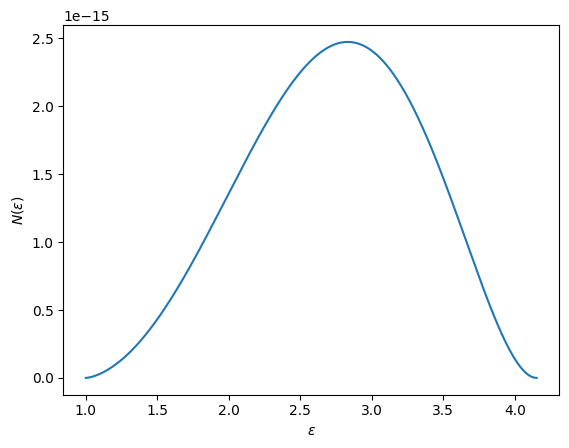

In [81]:
Q = 2.1221/0.51099895069
etas = np.linspace(0.001,Eta(Q),1000, endpoint=True)
Ns = N(etas, 1, Q)

plt.plot(etas, Ns)
plt.xlabel(r'$\eta$')
plt.ylabel(r'$N(\eta)$')
plt.show()
epsilons = np.linspace(1.001, Q, 1000, endpoint=True)
etas = Eta(epsilons)
Ns = N(etas, 1, Q)
plt.plot(epsilons, Ns)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$N(\epsilon)$')
plt.show()

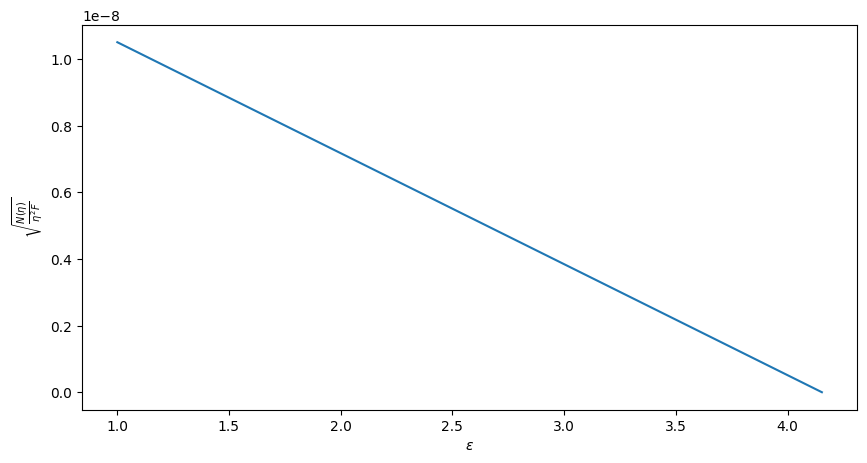

In [86]:
kurie = np.sqrt(Ns/(etas**2*fermi(Z, etas)))
plt.figure(figsize=(10,5))
plt.plot(epsilons, kurie)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\sqrt{\frac{N(\eta)}{\eta^2F}}$')
plt.show()